### Capstone Project: Using Machine Learning to Reduce Human/Medical costs Associated with Diabetes.

##### Paul Taiwo-Adeyemo, July 2022, BrainStation

##### Notebook #2 - Modelling

### Modelling

This notebook is a continuation of Notebook #1. In this notebook, the datasets from Notebook #1 will be modelled.

###### Order of Analysis
>1.Defining Functions to use for each modelling
>
>2.Applying the models to Dataset 1_0 and tuning hyperparameters
>
>3.Making a pipeline for all models used
>
>4.Summarizing the results in a dataset for visualization
>
>5.Applying the models to Dataset 1_1 and tuning hyperparameters
>
>6.Making a pipeline for all models used
>
>7.Summarizing the results in a dataset for visualization
>
>8.Applying the models to Dataset 2 and tuning hyperparameters
>
>9.Making a pipeline for all models used
>
>10.Summarizing the results in a dataset for visualization

Since the models used would be replicated for all three datasets, the models have been made into functions to avoid re-using codes.

In [1]:
#import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import packages for Machine Learning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

#Import necessary packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import KernelPCA
import seaborn as sns
#import plotly
import plotly.express as px
# configure some plotting settings to create consistent plots
plt.style.use('ggplot')
plt.figure(figsize=(10, 7.5))
sns.set(font="Times New Roman")
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold


<Figure size 720x540 with 0 Axes>

###### The following models will be used:
>1.Logistic Regression
>
>2.K Nearest Neighbors
>
>3.Decision Tree
>
>4.AdaBoost

##### Defining Functions to use
The functions to fit each of the four models, functions to optimize the four models and a pipeline to implement all four optimized models at once was created.

In [2]:
#function for Logistic Classification
def Logistic(X_train, y_train, X_test, y_test):
    logit = LogisticRegression()
    logit.fit(X_train, y_train)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    print(f'Score on train: {(logit.score(X_train, y_train))*100}')
    print(f'Score on test: {(logit.score(X_test, y_test))*100}')
    y_pred = logit.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(logit, X_test, y_test)


In [3]:
#function for Principal Component Analysis
def find_PCA(X_train,X_test ):
    #calculate the variance of captures by PCA
    my_PCA = PCA()
    my_PCA.fit(X_train)

    # transform data 
    X_train_PCA = my_PCA.transform(X_train)
    X_test_PCA = my_PCA.transform(X_test)
    print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
    print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

    print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
    print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")
    
    #explain variance
    expl_var = my_PCA.explained_variance_ratio_
    
    #visualize the variance
    plt.figure()
    plt.plot(range(1,(X_train.shape[1]+1)),expl_var,marker='.')
    plt.xlabel('Number of PCs')
    plt.ylabel('Proportion of Variance Explained')
    plt.title('Elbow Plot')
    plt.xticks(range(1,X_train.shape[1],20))
    plt.show()
    

In [4]:
#function to fit PCA
def fit_PCA(X_train, X_test, n):
    # import PCA
    from sklearn.decomposition import PCA
    
    # Default n_components will generate the same number of PCs as you have features 
    my_PCA = PCA(n_components=n)
    my_PCA.fit(X_train)

    # transform data 
    X_train_PCA = my_PCA.transform(X_train)
    X_test_PCA = my_PCA.transform(X_test)

In [5]:
#function to optimize Logistic Classification
def optimize_logistic(X_val, y_val):
    #Store the results
    cross_validation_scores = []

    C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

    #Do some cross validation
    for c in C_range:
        Logit_model = LogisticRegression(C=c,random_state=1)
    
        # the cross validation score (mean of scores from all folds)
        cv_score = np.mean(cross_val_score(Logit_model, X_test, y_test, cv = 5))
    
        cross_validation_scores.append(cv_score)

    plt.figure()
    plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
    #add legend
    plt.legend()
    #add log scale
    plt.xscale("log")
    #add axes label
    plt.xlabel('Regularization Parameter: C')
    plt.ylabel('Cross Validation Score')
    plt.grid()
    plt.show();

In [6]:
#function to run optimized logistic classification
def logistic_optimized(X_train, X_test, y_train, y_test, c):
    # Define logistic regression for PCA data
    my_logreg2_cv = LogisticRegression(C=c,random_state=1)

    # Fitting the PCA data
    my_logreg2_cv.fit(X_train,y_train)

    # Scoring on PCA train and test sets
    print(f'Train Score: {my_logreg2_cv.score(X_train, y_train)}')
    print(f'Test Score: {my_logreg2_cv.score(X_test, y_test)}')
    
    y_pred = my_logreg2_cv.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(my_logreg2_cv, X_test, y_test)

In [7]:
#function to fit KNN
def KNN(X_train, y_train, X_test, y_test):
    KNN_model = KNeighborsClassifier()

    # fit the model
    KNN_model.fit(X_train, y_train)

    # Score the model on the test set
    test_predictions = KNN_model.predict(X_test)
    test_accuracy = accuracy_score(test_predictions, y_test)
    print(f"Test set accuracy: {test_accuracy}")
    
    y_pred = KNN_model.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(KNN_model, X_test, y_test)

In [8]:
#fuction to optimize KNN
def optimize_KNN(X_validation, y_validation, X_train, y_train):
    # define range of k_values
    #40 is chosen as a arbitrary number

    k_values = list(range(1, 40))
    train_scores = []
    validation_scores = []

    #start the loop
    for k in k_values:
    
        knn = KNeighborsClassifier(n_neighbors=k)
    
        #fit the train data
        knn.fit(X_train, y_train)
    
        #Evaluate the scores for the train and test data
        train_scores.append(knn.score(X_train, y_train))
        validation_scores.append(knn.score(X_validation, y_validation))
 
    
    plt.figure()
    #define line 1 in plot
    plt.plot(k_values, train_scores, c='green', label='train')
    #define line 2 in plot
    plt.plot(k_values, validation_scores, c='blue', label='validation')
    #label x axis
    plt.xlabel('n neighbors')
    #label y-axis
    plt.ylabel('accuracy')
    #show legend
    plt.legend()
    #show title
    plt.title('Choosing the K number using the test and validation data')
    #show graph
    plt.show()
    

In [9]:
#function for optimized KNN
def KNN_optimized(X_train, y_train, n):
    # Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    #explain why this is set to new value
    KNN_model.fit(X_train, y_train)

    # Score the model on the test set
    test_predictions = KNN_model.predict(X_test)
    test_accuracy = accuracy_score(test_predictions, y_test)
    print(f"Test set accuracy: {test_accuracy}")
    y_pred = KNN_model.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(KNN_model, X_test, y_test)

In [10]:
#function to fit decision tree
def decision_tree(X_train, y_train, X_test, y_test):
    DTmodel = DecisionTreeClassifier()

    #fit the model
    DTmodel.fit(X_train, y_train)

    #evaluate the accuracy

    print(f'Training data has an accuracy of {DTmodel.score(X_train, y_train)}')
    print(f'Test data has an accuracy of {DTmodel.score(X_test, y_test)}')
    
    y_pred = DTmodel.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(DTmodel, X_test, y_test)

In [11]:
#function to optimize decision tree
def optimize_DT(X_validation, y_validation, X_train, y_train):
    # sourced from model evaluation lecture
    # implement the Tree model

    train_accs = []

    validation_accs = []

    #set depth values 
    depth_values = list(range(1,50,1))

    # set up loop data

    for i in depth_values:
        my_dt = DecisionTreeClassifier(max_depth = i)
        my_dt.fit(X_train_v,y_train_v)
    
        train_accs.append(my_dt.score(X_train,y_train))
        validation_accs.append(my_dt.score(X_validation,y_validation))

    


    # plot unscaled classifier results    
    plt.figure()
    plt.plot(depth_values,train_accs,label = 'train')
    plt.plot(depth_values,validation_accs,label = 'test')
    #label x-axis
    plt.xlabel('max depth')
    #label y-axis
    plt.ylabel('accuracy')
    #add title
    plt.title('Decision Tree accuracy')
    #plot legend
    plt.legend()
    #show graph
    plt.show()

    

In [12]:
#function for fitting optimized decision tree
def DT_optimized(X_train, X_test, y_train, y_test, m):
    #new decision tree with 9 as max_depth
    DTmodel = DecisionTreeClassifier(max_depth=m)

    #fit the model
    DTmodel.fit(X_train, y_train)

    #evaluate the accuracy

    print(f'Training data has an accuracy of {DTmodel.score(X_train, y_train)}')
    print(f'Test data has an accuracy of {DTmodel.score(X_test, y_test)}')
    
    y_pred = DTmodel.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(DTmodel, X_test, y_test)

In [13]:
#function to fit AdaBooster
def Adabooster(X_train, y_train, X_test, y_test):
    AB_model = AdaBoostClassifier()
    AB_model.fit(X_train, y_train)
    print(f"AdaBoost score on train-set : {AB_model.score(X_train, y_train)}")
    print(f"AdaBoost score on test_set : {AB_model.score(X_test, y_test)}")
    y_pred = AB_model.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    #print model evaluation metrics
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(AB_model, X_test, y_test)

In [14]:
#function to optimize AdaBooster
def optimize_AdaBooster(X_train, y_train,X_validation, y_validation ):
    # define range of k_values
    #30 is chosen as a arbitrary number

    n_estimators = list(range(1, 50))
    train_scores = []
    validation_scores = []

    #start the loop
    for n in n_estimators:
    
        AB_model = AdaBoostClassifier(n_estimators=n)
    
        #fir the train data
        AB_model.fit(X_train, y_train)
    
        # Evaluate the scores for the train and test data
        train_scores.append(AB_model.score(X_train, y_train))
        validation_scores.append(AB_model.score(X_validation, y_validation))
 
    
    plt.figure()
    #define line 1 in plot
    plt.plot(n_estimators, train_scores, c='green', label='train')
    #define line 2 in plot
    plt.plot(n_estimators, validation_scores, c='blue', label='validation')
    #label x axis
    plt.xlabel('n-estimators')
    #label y-axis
    plt.ylabel('accuracy')
    #show legend
    plt.legend()
    #show title
    plt.title('Choosing the n number using the test and validation data')
    #show graph
    plt.show()

In [15]:
#function to fit optimized AdaBooster
def Adabooster_optimized(X_train, y_train, X_test, y_test, n):
    AB_model = AdaBoostClassifier(n_estimators=n)
    AB_model.fit(X_train, y_train)
    print(f"AdaBoost score on train-set : {AB_model.score(X_train, y_train)}")
    print(f"AdaBoost score on test_set : {AB_model.score(X_test, y_test)}")
    y_pred = AB_model.predict(X_test)
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
    print(f"\033[1m\033[94m \n{20 * '-'}\033[0m") 
    
    plot_confusion_matrix(AB_model, X_test, y_test)

#### Dataset 1.0
>Fitting the four models for Dataset 1. Refer to introduction in Notebook #1 for dataset1 description.

In [16]:
#load dataset 1
dataset1_df0 = pd.read_csv('dataset1_part0_cleaned.csv')

In [17]:
#convert categorical columns in dataset 1 into numerical features using dummy
dummy_dataset1_df0 = pd.get_dummies(dataset1_df0)

In [18]:
#define X and Y
X = dummy_dataset1_df0.drop('readmitted', axis=1)
Y = dummy_dataset1_df0['readmitted']

In [19]:
#split into train and test 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=1)

In [20]:
# Splitting the remainder in two new data and validation
X_train_v, X_validation, y_train_v, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3,
                     random_state=1)

#scale the data 
#scale the new dataset
scaler = MinMaxScaler()

#fit the dataset
scaler.fit(X_train_v)

#transform the dataset
X_train_v_mm = scaler.transform(X_train_v)
X_validation_mm = scaler.transform(X_validation)

In [21]:
#scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)

#fit data
X_test_mmscalar = scaler.transform(X_test)
X_train_mmscalar = scaler.transform(X_train)

 
--------------------
Score on train: 62.43612780055028
Score on test: 62.27972486079266
 
--------------------
Accuracy Score : 0.6227972486079266
Precision Score : 0.617347424545368
Recall Score : 0.4637722623560546
F1 Score : 0.5296520176441758
 
--------------------


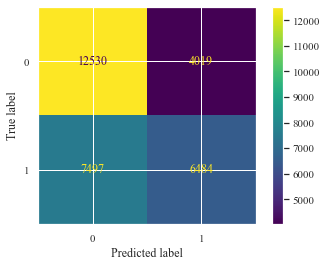

In [22]:
#Fitting Logistic regression for dataset 1
Logistic(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The accuracy is 62.44%, while the precision is 62.04%. The accuracy is quite low possibly owing to the fact that the features are not strongly predictive of whether or not a patient will be readmitted. Also, the weight column, which was over 96% empty and was subsequently dropped would have potentially be a better predictor and boosted the accuracy score. The model will be optimized  with the PCA and C values.

Variance captured by PC1:  0.671
Variance captured by PC2:  0.503
Proportion of variance captured by PC1:  0.103
Proportion of variance captured by PC2:  0.078


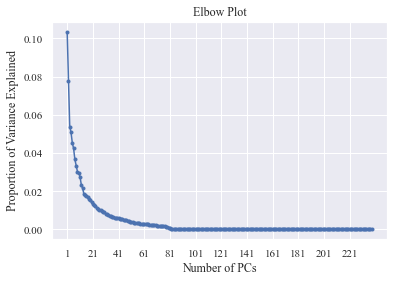

In [23]:
#### PCA
find_PCA(X_train_mmscalar,X_test_mmscalar )

According to the PCA elbow plot, the proportion oa varience evens out after 81 number of principal compoments. Therefore, the n_components would be set at 81. 

In [24]:
#### fit PCA

from sklearn.decomposition import PCA
    

my_PCA = PCA(n_components=81)
my_PCA.fit(X_train_mmscalar)

# transform data 
X_train_PCA = my_PCA.transform(X_train_mmscalar)
X_test_PCA = my_PCA.transform(X_test_mmscalar)

Next, an elbow plot would be name to find the best value for C.

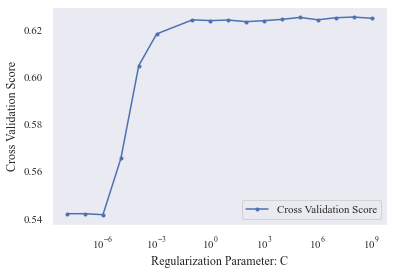

In [25]:
#### Find C
optimize_logistic(X_validation_mm, y_validation)

According to the elbow plot above, 10^-3 would beused a the value for C.

Train Score: 0.5842411140434611
Test Score: 0.5794955781198821
 
--------------------
Accuracy Score : 0.5794955781198821
Precision Score : 0.5624658432615587
Recall Score : 0.36807095343680707
F1 Score : 0.4449632511889321
 
--------------------


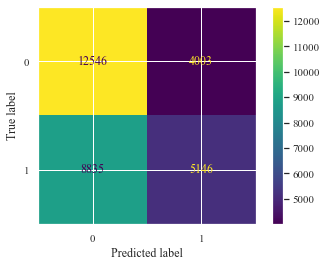

In [26]:
#### fit Logistic optimized
logistic_optimized(X_train_PCA, X_test_PCA, y_train, y_test, 0.001)

The final accuracy of the optimized logistic regression is 57.9%.

Training data has an accuracy of 0.9999578864619013
Test data has an accuracy of 0.5592531935800852
 
--------------------
Accuracy Score : 0.5592531935800852
Precision Score : 0.5183553597650514
Recall Score : 0.5302195837207639
F1 Score : 0.5242203521674564
 
--------------------


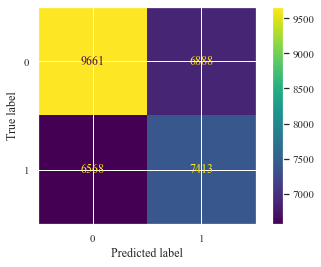

In [27]:
# fitting DT
decision_tree(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The decision tree has an accuracy of 55.9%. Next, the max depth would be optimized.

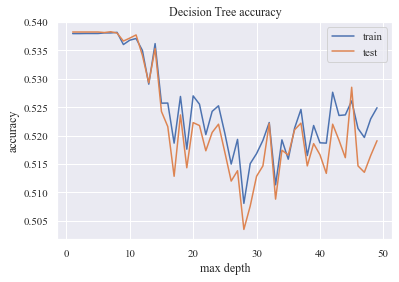

In [28]:
#### optimize DT
optimize_DT(X_validation_mm, y_validation, X_train_v_mm, y_train_v)

The best value for max_depth seems to be 8, as this is the point where the train an dtest treadline and both closet and highest. 

Training data has an accuracy of 0.6356898197540569
Test data has an accuracy of 0.6277759580740255
 
--------------------
Accuracy Score : 0.6277759580740255
Precision Score : 0.6185772541912098
Recall Score : 0.4882340319004363
F1 Score : 0.5457307323313079
 
--------------------


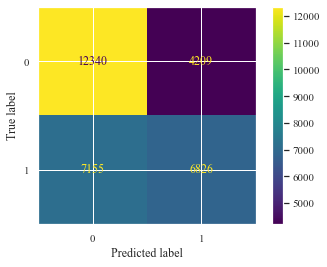

In [29]:
#### DT
DT_optimized(X_train_mmscalar, X_test_mmscalar, y_train, y_test, 8)

The optimized DT model has an accuracy of 62.8%, much better than it's previous value of 55.9%.

Test set accuracy: 0.5534556174254831
 
--------------------
Accuracy Score : 0.5534556174254831
Precision Score : 0.5128016480282519
Recall Score : 0.49853372434017595
F1 Score : 0.5055670402205055
 
--------------------


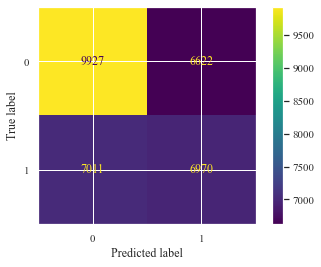

In [30]:
#### fit a KNN model
KNN(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The KNN model ran slowly and returned a l low accuracy of 55.3%. Therefore the model would no longer be optimized.

AdaBoost score on train-set : 0.6280391936661238
AdaBoost score on test_set : 0.6290533901080904
 
--------------------
Accuracy Score : 0.6290533901080904
Precision Score : 0.6189537800071659
Recall Score : 0.4942421858236178
F1 Score : 0.549612248956055
 
--------------------


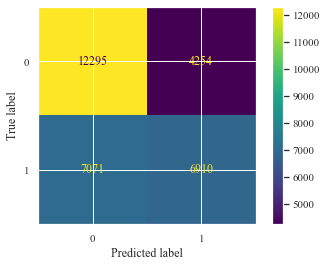

In [31]:
#### fit an AdaBooster model
Adabooster(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The AdaBooster returned an accuracy of 62.9% without optimization. Next, the n_estimator would be estimated.

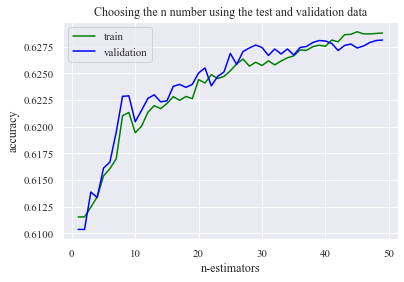

In [32]:
####optimize adabooster
optimize_AdaBooster(X_train_v_mm, y_train_v,X_validation_mm, y_validation)

The n_estimator value when at 30 appears to be the point when the values of the train and validation treadlines are highest and closest together. 

AdaBoost score on train-set : 0.6264248413723398
AdaBoost score on test_set : 0.6279397314117262
 
--------------------
Accuracy Score : 0.6279397314117262
Precision Score : 0.6186210640608035
Recall Score : 0.4890208139618053
F1 Score : 0.5462389645667719
 
--------------------


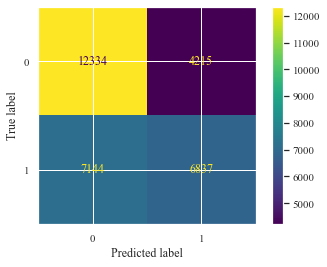

In [33]:
#fit optimized AdaBooster
Adabooster_optimized(X_train, y_train, X_test, y_test, 30)

The final accuracy of the AdaBooster model is 62.8%.

Next, the best parameters for the best model as shown by the grid search as well as the parameters for the remaining 4 models would be put into a pipeline.

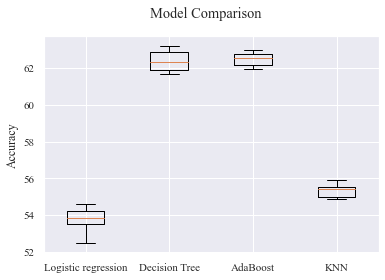

In [34]:
#fit pipeline for all four models
#append all four models in pipeline
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , MinMaxScaler()),('LR' ,LogisticRegression(C=0.000001))]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,DecisionTreeClassifier(max_depth=8))]))))
pipelines.append(('scaledAda' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,AdaBoostClassifier(n_estimators=30))]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , MinMaxScaler()),('KNN' ,KNeighborsClassifier())]))))


#outline model names
model_name = ['Logistic regression', 'Decision Tree', 'AdaBoost', 'KNN']
results = []
#itirate over models in pipeline
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results*100)
    
# Compare different model results
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(model_name)
plt.show()

Finally, the results would be saved into a dataframe for visualization.

<AxesSubplot:title={'center':'Model Evaluation'}, xlabel='Model', ylabel='Percentage'>

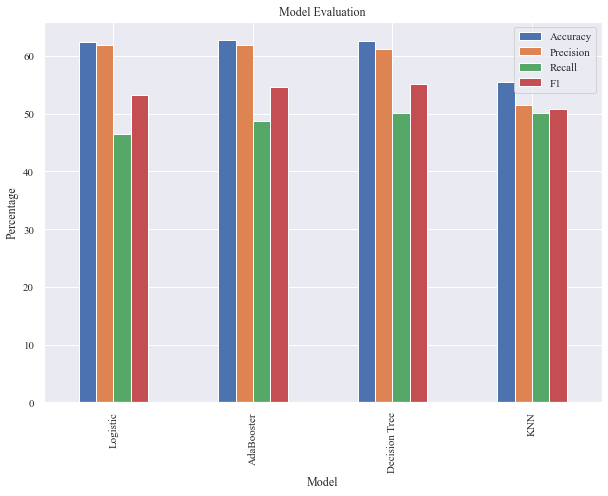

In [35]:
#dataframe to summarize findings
data = {'Logistic':[62.3,61.7,46.4,53.0],
          'AdaBooster':[62.8,61.9,48.8,54.6],
          'Decision Tree':[62.8,61.9,48.8,54.6],
          'KNN':[55.3,51.3,49.85,50.6],
         'Evaluation Metric':['Accuracy', 'Precision','Recall','F1']
          }

add_index=['Accuracy', 'Precision','Recall','F1']

Dataset1_0_result = pd.DataFrame(data, index=add_index)

Dataset1_0_result

a = (Dataset1_0_result.drop(columns=['Evaluation Metric'], axis=1).transpose())

#visualize model evaluation summary

a.plot.bar(figsize=(10, 7), grid=True, xlabel= 'Model', ylabel= 'Percentage', title='Model Evaluation')

### Dataset 1.1 - Comprises of the <30 and >30 categories for the target feature (readmitted)
Refer to introduction for full description of dataset 1.1.

In [36]:
#load dataset
dataset1_df1 = pd.read_csv('dataset1_part1_cleaned.csv')

In [37]:
#convert non-numerical columns to numerical using dummy df
dummy_dataset1_df1 = pd.get_dummies(dataset1_df1)

In [38]:
#define X and Y
X = dummy_dataset1_df1.drop('readmitted', axis=1)
Y = dummy_dataset1_df1['readmitted']

In [39]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=1)

In [40]:
# Splitting the remainder in two new train data and validation
X_train_v, X_validation, y_train_v, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3,
                     random_state=1)

#scale the data 
#scale the new dataset
scaler = MinMaxScaler()

#fit the dataset
scaler.fit(X_train_v)

#transform the dataset
X_train_v_mm = scaler.transform(X_train_v)
X_validation_mm = scaler.transform(X_validation)

In [41]:
#scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)

#fit data
X_test_mmscalar = scaler.transform(X_test)
X_train_mmscalar = scaler.transform(X_train)

 
--------------------
Score on train: 75.58100575675428
Score on test: 76.19216828938953
 
--------------------
Accuracy Score : 0.7619216828938953
Precision Score : 0.7632498751694129
Recall Score : 0.9971111732364178
F1 Score : 0.8646464646464647
 
--------------------


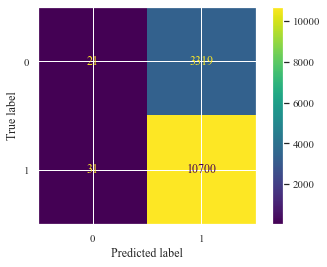

In [42]:
# fit Logistic model
Logistic(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The logistic model has an accuracy of 76.2%, which is higher than the score on the train sample. This model would not be selected as the best model to be used, a model with test score that is both high and not more than the train score will be used instead. The higher test score might be owing to the fact that the model might have been overfit.

Variance captured by PC1:  0.646
Variance captured by PC2:  0.587
Proportion of variance captured by PC1:  0.098
Proportion of variance captured by PC2:  0.089


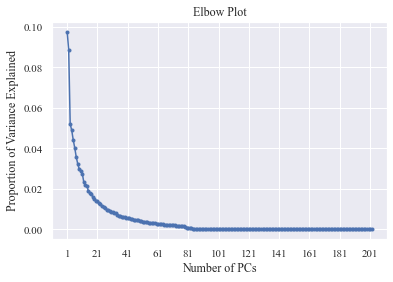

In [43]:
#### find Principal Component Analysis
find_PCA(X_train_mmscalar,X_test_mmscalar )

A PCA value of 21 seems apprppriate for this PCA analysis from the elbow plot, as this is the point where the proportion of variance tapers off. 

In [44]:
#### fit PCA

from sklearn.decomposition import PCA
    
# Default n_components will generate the same number of PCs as you have features 
my_PCA = PCA(n_components=21)
my_PCA.fit(X_train)

# transform data 
X_train_PCA = my_PCA.transform(X_train_mmscalar)
X_test_PCA = my_PCA.transform(X_test_mmscalar)

Next, the value of C would be determined using an a cross-validation plot

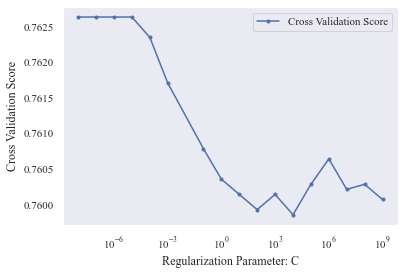

In [45]:
#### Find C
optimize_logistic(X_validation_mm, y_validation)

A C value of 0.0001 seems appropriste from the plot above as the score starts to drop from that point

Train Score: 0.7558100575675428
Test Score: 0.7626323644374956
 
--------------------
Accuracy Score : 0.7626323644374956
Precision Score : 0.7626323644374956
Recall Score : 1.0
F1 Score : 0.8653334408515442
 
--------------------


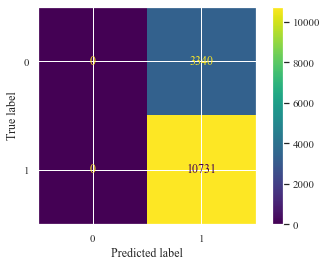

In [46]:
#### fit optimized Logistic model
logistic_optimized(X_train_PCA, X_test_PCA, y_train, y_test, 0.0001)

The logistic model had an accuracy of 76.2%. But the recall rate is too high, this is possibly due to overfitting.

Training data has an accuracy of 1.0
Test data has an accuracy of 0.6451567052803638
 
--------------------
Accuracy Score : 0.6451567052803638
Precision Score : 0.7769839737401043
Recall Score : 0.7499767030099711
F1 Score : 0.7632415003082175
 
--------------------


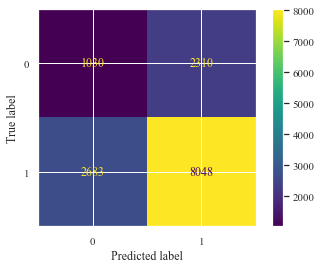

In [47]:
#### fit DT model
decision_tree(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The train dataset is definitely overfit, as it had a perfect accuracy on train set. The accuracy on test set is 64.5% the model will be optimized regardless.

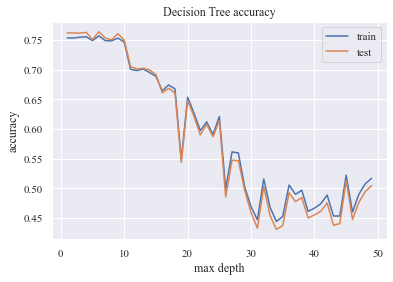

In [48]:
#### optimize DT
optimize_DT(X_validation_mm, y_validation, X_train_v_mm, y_train_v)

A max-depth of 8 seems appropriate from the plot as this is the point where the values of the train and validation treadlines are highest and closest together.

Training data has an accuracy of 0.7672931071243642
Test data has an accuracy of 0.7617795465851752
 
--------------------
Accuracy Score : 0.7617795465851752
Precision Score : 0.7685030201586494
Recall Score : 0.9840648588202404
F1 Score : 0.8630271330500164
 
--------------------


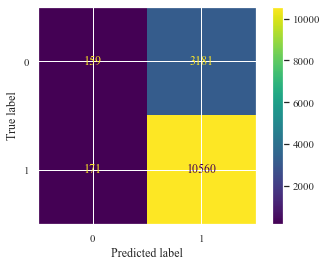

In [49]:
#fit optimized DT
DT_optimized(X_train_mmscalar, X_test_mmscalar, y_train, y_test, 8)

While the model scores well on accuracy (76.1%), the recall is quite high. A better model will be chosen as best model.

Test set accuracy: 0.7210574941368773
 
--------------------
Accuracy Score : 0.7210574941368773
Precision Score : 0.7698223913732952
Recall Score : 0.9047619047619048
F1 Score : 0.8318553742021163
 
--------------------


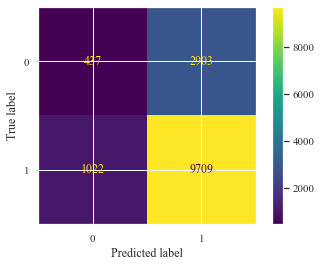

In [50]:
#Fit KNN model
KNN(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The KNN model has an accuracy of 72.1% and a precision of 77.0%.

AdaBoost score on train-set : 0.7559928116718955
AdaBoost score on test_set : 0.761211001350295
 
--------------------
Accuracy Score : 0.761211001350295
Precision Score : 0.7635323560958169
Recall Score : 0.9950610381138757
F1 Score : 0.8640556724389059
 
--------------------


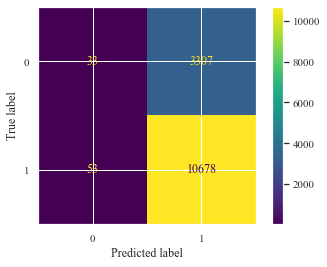

In [51]:
#Fit AdaBooster model
Adabooster(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The AdaBooster model has an accuracy of 76.1 and a precision of 76.4%.

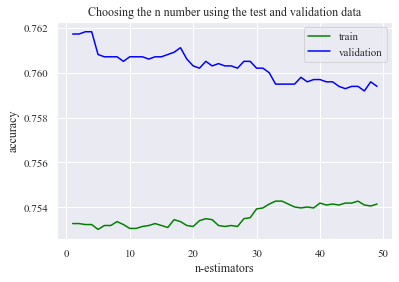

In [52]:
####optimize adabooster
optimize_AdaBooster(X_train_v_mm, y_train_v,X_validation_mm, y_validation)

The n_estimators value when at 40 appears to be the point when the values of the train and validation treadlines are highest and closest together.

AdaBoost score on train-set : 0.7559623526545034
AdaBoost score on test_set : 0.7614952739677351
 
--------------------
Accuracy Score : 0.7614952739677351
Precision Score : 0.763374044711092
Recall Score : 0.9959929177150312
F1 Score : 0.8643053533883228
 
--------------------


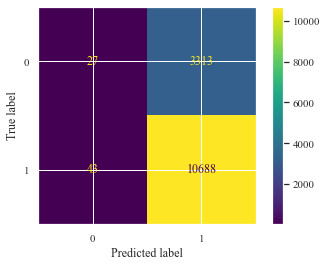

In [53]:
Adabooster_optimized(X_train, y_train, X_test, y_test, 40)

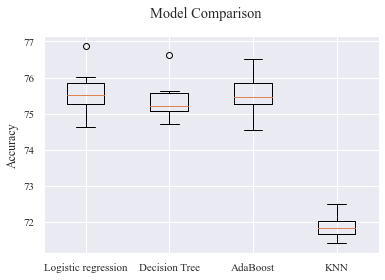

In [54]:
#fit pipeline for all four models
#append all four models in pipeline
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , MinMaxScaler()),('LR' ,LogisticRegression(C=0.0001))]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,DecisionTreeClassifier(max_depth=8))]))))
pipelines.append(('scaledAda' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,AdaBoostClassifier(n_estimators=40))]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , MinMaxScaler()),('KNN' ,KNeighborsClassifier())]))))


#outline model names
model_name = ['Logistic regression', 'Decision Tree', 'AdaBoost', 'KNN']
results = []
#itirate over models in pipeline
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results*100)
    
# Compare different model results
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(model_name)
plt.show()

<AxesSubplot:title={'center':'Model Evaluation'}, xlabel='Model', ylabel='Percentage'>

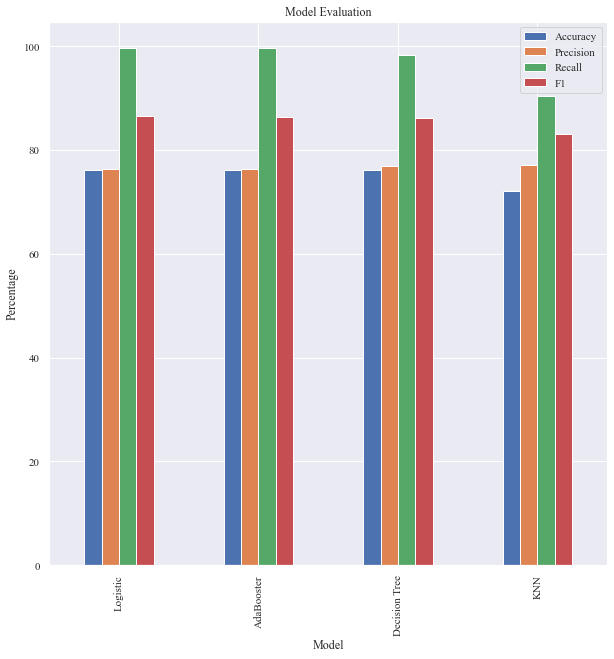

In [55]:
#dataframe to summarize findings
data = {'Logistic':[76.3, 76.3, 100, 86.5],
          'AdaBooster':[76.1, 76.3, 99.6, 86.4],
          'Decision Tree':[76.2, 76.9, 98.4, 86.3],
          'KNN':[72.1, 77.0, 90.5, 83.2],
         'Evaluation Metric':['Accuracy', 'Precision','Recall','F1']
          }

add_index=['Accuracy', 'Precision','Recall','F1']

Dataset2_result = pd.DataFrame(data, index=add_index)



a = (Dataset2_result.drop(columns=['Evaluation Metric'], axis=1).transpose())



a.plot.bar(figsize=(10, 10), grid=True, xlabel= 'Model', ylabel= 'Percentage', title='Model Evaluation')

#### Dataset 2 - This dataset uses lifestyle choices and health parameters to predict the incidence of diabetes
Refer to intriduction in Notebook #1 for full dataset deecription

In [56]:
#load dataset
dataset2_df = pd.read_csv('dataset2_cleaned.csv')

In [57]:
#define X and Y
X = dataset2_df.drop('Diabetes_binary', axis=1)
y = dataset2_df['Diabetes_binary']

In [58]:
#split into train and test 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)

In [59]:
# Splitting the remainder in two new data and validation
X_train_v, X_validation, y_train_v, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3,random_state=1)

In [60]:
#scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)

#fit data
X_test_mmscalar = scaler.transform(X_test)
X_train_mmscalar = scaler.transform(X_train)

 
--------------------
Score on train: 84.78375905024559
Score on test: 84.81908109756984
 
--------------------
Accuracy Score : 0.8481908109756984
Precision Score : 0.5270336093521676
Recall Score : 0.1024427191819731
F1 Score : 0.17154181529924692
 
--------------------


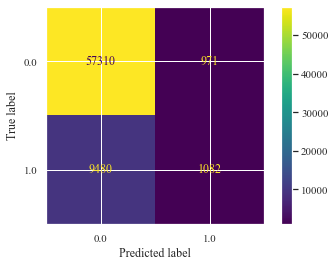

In [61]:
#Fitting Logistic regression for dataset 1
Logistic(X_train, y_train, X_test, y_test)

The accuracy come up as 84.8%, and the precision as 51.8%. It also has a low recall of 10.2%. Next, the model will be optiized with PCA and C hyperparameter.

Variance captured by PC1:  66.784
Variance captured by PC2:  44.835
Proportion of variance captured by PC1:  0.524
Proportion of variance captured by PC2:  0.352


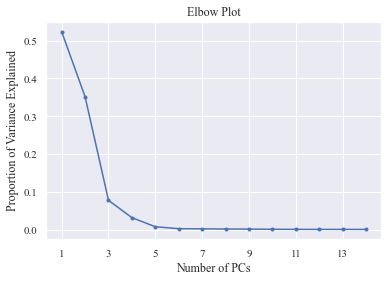

In [62]:
#### PCA
my_PCA = PCA()
my_PCA.fit(X_train)

# transform data 
X_train_PCA = my_PCA.transform(X_train_mmscalar)
X_test_PCA = my_PCA.transform(X_test_mmscalar)
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")
    
#explain variance
expl_var = my_PCA.explained_variance_ratio_

#visualize the variance
plt.figure()
plt.plot(range(1,(X_train.shape[1]+1)),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Elbow Plot')
plt.xticks(range(1,X_train.shape[1],2))
plt.show()

According to the PCA elbow plot, the proportion oa varience evens out after 81 number of principal compoments. Therefore, the n_components would be set at 7. 

In [63]:
#### fit PCA
    
# Default n_components will generate the same number of PCs as you have features 
my_PCA = PCA(n_components=7)
my_PCA.fit(X_train)

# transform data 
X_train_PCA = my_PCA.transform(X_train_mmscalar)
X_test_PCA = my_PCA.transform(X_test_mmscalar)

Next, an elbow plot would be name to find the best value for C.

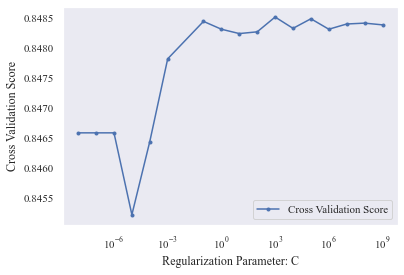

In [64]:
#### Find C
optimize_logistic(X_validation_mm, y_validation)

According to the elbow plot above, 0.001 would be used a the value for C.

Train Score: 0.8473208782862586
Test Score: 0.8466801272460526
 
--------------------
Accuracy Score : 0.8466801272460526
Precision Score : 0.6521739130434783
Recall Score : 0.0014201855709145995
F1 Score : 0.0028341993386868207
 
--------------------


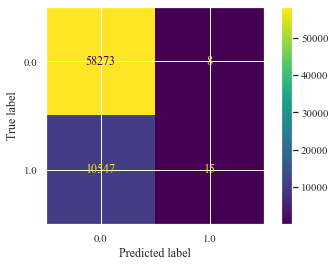

In [65]:
#fit Logistic optimized
logistic_optimized(X_train_PCA, X_test_PCA, y_train, y_test, 0.001)

The final accuracy of the optimized logistic regression is 84.7%. No improvement from the unoptimized model.

Training data has an accuracy of 0.9701552004283108
Test data has an accuracy of 0.7859767877634618
 
--------------------
Accuracy Score : 0.7859767877634618
Precision Score : 0.2949272512780181
Recall Score : 0.2840371141829199
F1 Score : 0.2893797627085946
 
--------------------


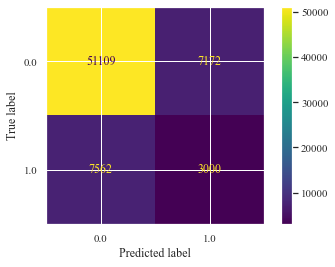

In [66]:
#fitting DT model
decision_tree(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The accuracy of the Decision Tree model is 78.6%.

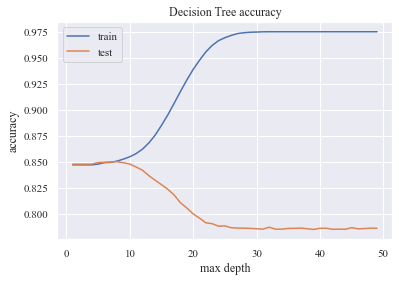

In [67]:
#### optimize DT
optimize_DT(X_validation, y_validation, X_train_v, y_train_v)

The best value for max_depth seems to be 15, as this is the point where the train an dtest treadline and both closet and highest.

Training data has an accuracy of 0.8774146957934645
Test data has an accuracy of 0.8301497610505062
 
--------------------
Accuracy Score : 0.8301497610505062
Precision Score : 0.38935629035413816
Recall Score : 0.18841128574133686
F1 Score : 0.25393989663752947
 
--------------------


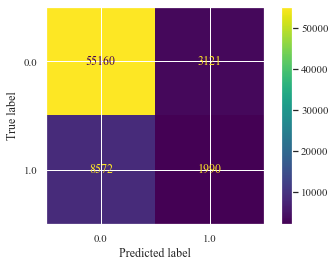

In [68]:
#### fit optimized DT
DT_optimized(X_train_mmscalar, X_test_mmscalar, y_train, y_test, 15)

The optimized DT model has an accuracy of 83.0%, much better than it's previous value of 78.6%.

Test set accuracy: 0.8308905771102363
 
--------------------
Accuracy Score : 0.8308905771102363
Precision Score : 0.39285714285714285
Recall Score : 0.18746449536072712
F1 Score : 0.25381361363927696
 
--------------------


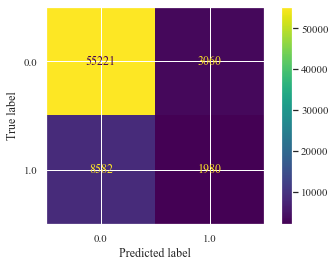

In [69]:
#fit a KNN model
KNN(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The KNN model ran slowly and returned an 82.9%. Therefore the model would no longer be optimized.

AdaBoost score on train-set : 0.8508195802802697
AdaBoost score on test_set : 0.8502534752988684
 
--------------------
Accuracy Score : 0.8502534752988684
Precision Score : 0.5478985232866338
Recall Score : 0.13700056807422836
F1 Score : 0.21919260774066499
 
--------------------


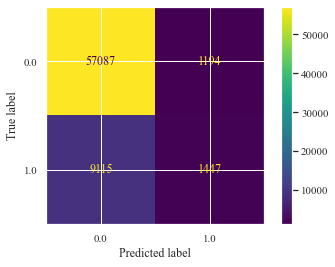

In [70]:
#fit an AdaBooster model
Adabooster(X_train_mmscalar, y_train, X_test_mmscalar, y_test)

The AdaBooster returned an accuracy of 85.0% without optimization. Next, the n_estimator would be estimated.

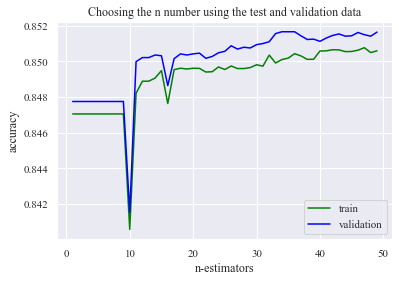

In [71]:
####optimize adabooster
optimize_AdaBooster(X_train_v, y_train_v,X_validation, y_validation)

The n_estimator value when at 30 appears to be the point when the values of the train and validation treadlines are highest and closest together.

AdaBoost score on train-set : 0.8504211515834428
AdaBoost score on test_set : 0.8495271850442311
 
--------------------
Accuracy Score : 0.8495271850442311
Precision Score : 0.5382297551789077
Recall Score : 0.13529634538913085
F1 Score : 0.21623666490126356
 
--------------------


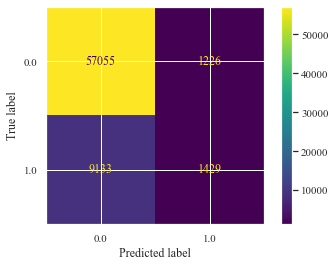

In [72]:
Adabooster_optimized(X_train, y_train, X_test, y_test, 30)

The optimized AdaBooster model had an accuracy of 84.9%, not an improvement from the original 85.0% accuracy.

Next, the result of the models for dataset 2 will be summarized into a dataset for visualization

In [73]:
#dataframe to summarize findings
data = {'Logistic':[84.8, 52.7, 10.2, 17.2],
          'AdaBooster':[84.9,53.8,13.5,21.6],
          'Decision Tree':[83.0,38.9,18.8,25.4],
          'KNN':[83.1,39.3,18.7,25.4],
         'Evaluation Metric':['Accuracy', 'Precision','Recall','F1']
          }

add_index=['Accuracy', 'Precision','Recall','F1']

Dataset2_result = pd.DataFrame(data, index=add_index)

In [74]:
a = (Dataset2_result.drop(columns=['Evaluation Metric'], axis=1).transpose())

<AxesSubplot:title={'center':'Model Evaluation'}, xlabel='Model', ylabel='Percentage'>

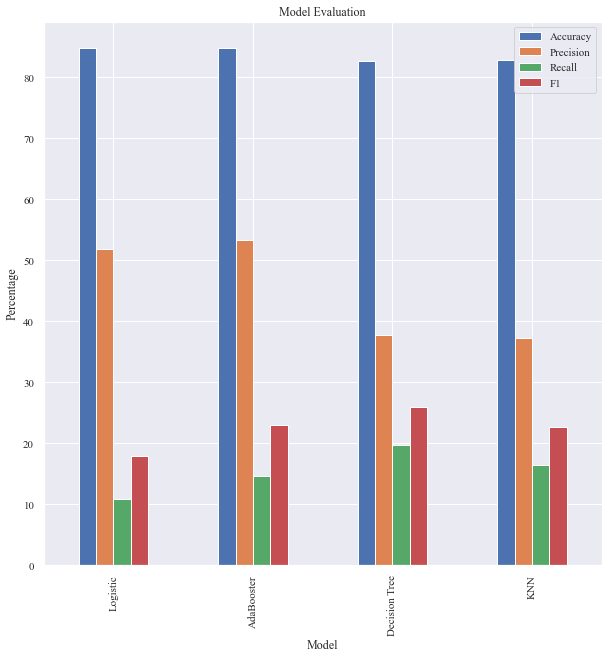

In [75]:
a.plot.bar(figsize=(10, 10), grid=True, xlabel= 'Model', ylabel= 'Percentage', title='Model Evaluation')

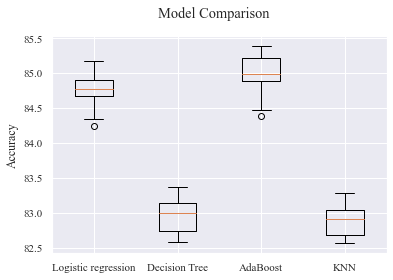

In [76]:
#fit pipeline for all four models
#append all four models in pipeline
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , MinMaxScaler()),('LR' ,LogisticRegression(C=0.001))]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,DecisionTreeClassifier(max_depth=15))]))))
pipelines.append(('scaledAda' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,AdaBoostClassifier(n_estimators=30))]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , MinMaxScaler()),('KNN' ,KNeighborsClassifier())]))))


#outline model names
model_name = ['Logistic regression', 'Decision Tree', 'AdaBoost', 'KNN']
results = []
#itirate over models in pipeline
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results*100)
    
# Compare different model results
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(model_name)
plt.show()

###### The work continues in Notebook #3, where deep learning techniques would be used in the effort to improve the accuracy of dataset1.0 and 1.1 accuracy score.